In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


In [2]:
import numpy as np
import pandas as pd
import scipy.stats as ss
np.random.seed(102)


$z_i \sim Categorical(\pi)$

$x_i | z_i \sim Normal(\mu_{z_i}, \sigma_{z_i}^2)$

[78] [122]


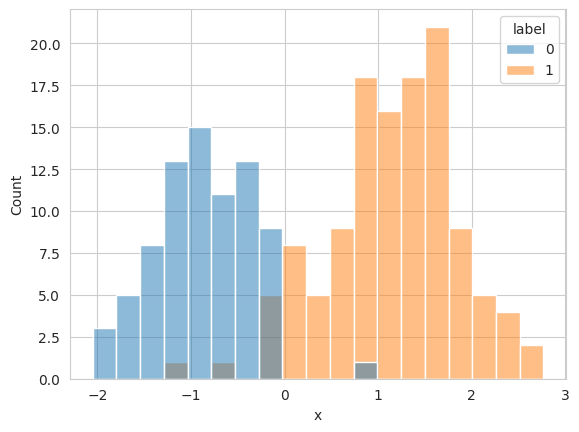

In [3]:
N = 200
pi = 0.4
N_x = np.random.binomial(n = N, p = pi, size = 1)
N_y = N - N_x
print(N_x, N_y)
mu_x = np.array(-0.8)
sd_x = np.array(0.5)
mu_y = np.array(1.1)
sd_y = np.array(0.7)
x = np.random.normal(mu_x, sd_x, N_x)
y = np.random.normal(mu_y, sd_y, N_y)

dat_x = pd.DataFrame({"x": x, "label": 0})
dat_y = pd.DataFrame({"x": y, "label": 1})
dat = pd.concat([dat_x, dat_y], axis=0)
sns.histplot(data=dat, x="x", hue="label", binwidth=0.25)
plt.show()

In [7]:
pi = np.array([0.5, 0.5])
m_x = np.random.normal(size=1)
m_y = np.random.normal(size=1)
s_x = 0.1
s_y = 0.1

obs = dat["x"].to_numpy()
N = len(obs)

E-step: $\gamma_{n,k}^t = \frac{\pi_k^t f(x_n; \theta_k^t)}{\sum_{k} \pi_k^t f(x_n; \theta_k^t)}$.

M-step:

- $\pi_k^{t+1} = \frac{\sum_{n} \gamma_{n,k}^t}{N}$
- $\mu_k^{t+1} = \frac{\sum_n \gamma_{n,k}^t x_n}{\sum_n \gamma_{n,k}^t}$
- $\sigma_k^{t+1} = \sqrt{\frac{\sum_n \gamma_{n,k}^t (x_n - \mu_k)^2}{\sum_n \gamma_{n,k}^t}}$


In [13]:
iter = 100
for i in range(iter):
  # E-step:
  gamma0 = pi[0] * ss.norm.pdf(obs, loc=m_x, scale=s_x)
  gamma1 = pi[1] * ss.norm.pdf(obs, loc=m_y, scale=s_y)
  norm = gamma0 + gamma1
  gamma0 = gamma0/norm
  gamma1 = gamma1/norm

  # M-step:
  pi[0] = np.sum(gamma0) / N
  pi[1] = np.sum(gamma1) / N

  gamma_sum0 = np.sum(gamma0)
  gamma_sum1 = np.sum(gamma1)
  m_x = np.sum(gamma0 * obs) / gamma_sum0
  m_y = np.sum(gamma1 * obs) / gamma_sum1

  s_x = np.sqrt(np.sum(gamma0 * (obs - m_x)**2) / gamma_sum0)
  s_y = np.sqrt(np.sum(gamma1 * (obs - m_y)**2) / gamma_sum1)











In [ ]:
for iter in range(100):
  # Compute gamma^t_k
  p0 = pi[0]*ss.norm.pdf(obs, loc=m_x, scale=s_x)
  p1 = pi[1]*ss.norm.pdf(obs, loc=m_y, scale=s_y)
  norm = p0 + p1
  gamma_0 = p0/norm
  gamma_1 = p1/norm
  pi[0] = np.mean(gamma_0)
  pi[1] = np.mean(gamma_1)
  m_x = np.sum(gamma_0 * obs)/np.sum(gamma_0)
  m_y = np.sum(gamma_1 * obs)/np.sum(gamma_1)
  s_x = np.sqrt(np.sum(gamma_0 * (obs - m_x)**2)/np.sum(gamma_0))
  s_y = np.sqrt(np.sum(gamma_1 * (obs - m_y)**2)/np.sum(gamma_1))
  if iter % 10 == 0:
    print(iter, pi, m_x, m_y, s_x, s_y)



0 [0.29651673 0.70348327] -1.08445563671272 0.8398686266324146 0.31638606790609597 0.8248456831604043
10 [0.36372298 0.63627702] -0.9293067389244294 0.9544341303586528 0.41786044412399953 0.788917422015034
20 [0.39660271 0.60339729] -0.8875726073794149 1.029649942693302 0.44077455105650115 0.7328319923276344
30 [0.40491245 0.59508755] -0.8755693009492013 1.0482544967696295 0.44765916259299177 0.7191749167593009
40 [0.40672483 0.59327517] -0.8728707565648753 1.0522815107715908 0.44924676030853894 0.7162365663730216
50 [0.40710742 0.59289258] -0.8722972531087297 1.0531300219021786 0.4495862886170659 0.7156184201918331
60 [0.40718764 0.59281236] -0.8721768394206677 1.0533078500783493 0.4496576737109329 0.7154889163766065
70 [0.40720443 0.59279557] -0.8721516217113909 1.0533450774924977 0.4496726278726938 0.7154618074231531
80 [0.40720795 0.59279205] -0.8721463433059968 1.0533528690610572 0.44967575816817523 0.7154561337012948
90 [0.40720868 0.59279132] -0.8721452385887318 1.05335449973057

In [9]:
print(mu_x, mu_y)

-0.8 1.1


In [14]:
print(m_x, m_y)

1.3238137352498969 -0.7218698672618113


In [15]:
print(sd_x, sd_y)

0.5 0.7


In [16]:
print(s_x, s_y)

0.5602571948857943 0.5851493384110636


In [24]:
z = (gamma0 > 0.5).astype(int)
print(z)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1
 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1]


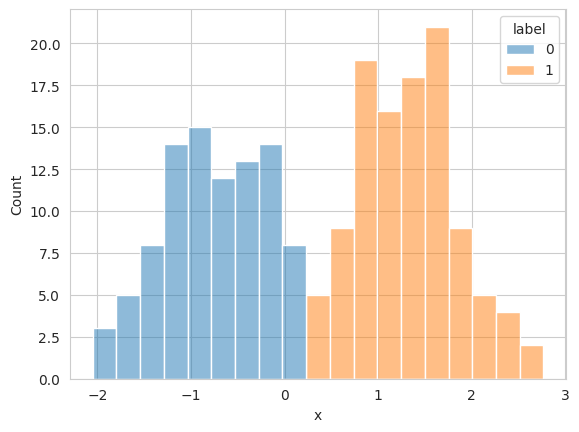

In [25]:
pred_dat = pd.DataFrame({"x": obs, "label": z})
sns.histplot(data=pred_dat, x="x", hue="label", binwidth=0.25)
plt.show()

In [26]:
dat["label"]

,label
0,0
1,0
2,0
3,0
4,0
...,...
117,1
118,1
119,1
120,1


In [32]:
ii = np.where(z != dat["label"].to_numpy())[0]
print(ii)
gamma0[ii]
obs[29]

[ 29  84 104 110 131 137 140 150 152 157 158 166 169 170 191 192]


0.9142814669341432

In [33]:
N_x = 100
N_y = 80
mu_x = np.array([-0.8, 1.1])
Sigma_x = np.array([[1, 0.5], [0.5, 1]])
mu_y = np.array([0.1, 0.3])
Sigma_y = np.array([[1, 0.5], [0.5, 1]])
x = np.random.multivariate_normal(mu_x, Sigma_x, N_x)
y = np.random.multivariate_normal(mu_y, Sigma_y, N_y)

dat_x = pd.DataFrame({"x": x[:, 0], "y": x[:, 1], "label": 0})
dat_y = pd.DataFrame({"x": y[:, 0], "y": y[:, 1], "label": 1})
dat = pd.concat([dat_x, dat_y], axis=0)
dat


,x,y,label
0,-0.586820,1.572433,0
1,0.871686,4.142277,0
2,-2.453478,-0.729365,0
3,0.178110,1.808173,0
4,-1.621279,0.860818,0
...,...,...,...
75,0.281713,0.160092,1
76,-0.211890,0.505077,1
77,0.093659,2.089523,1
78,0.616123,0.207070,1


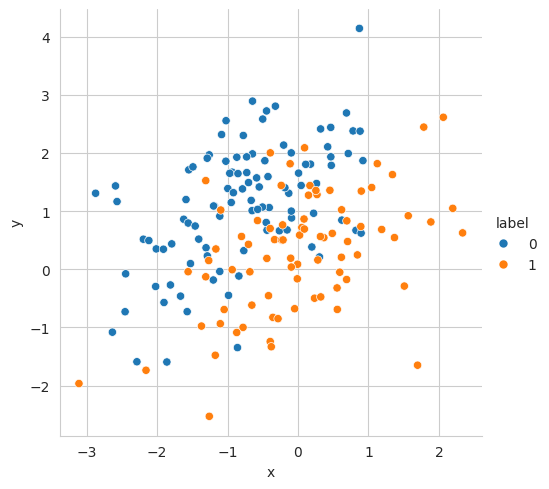

In [34]:

sns.relplot(data=dat, x="x", y="y", hue="label", kind="scatter")
plt.show()


In [42]:
pi = np.array([0.5, 0.5])
m_x = np.random.normal(size=2)
m_y = np.random.normal(size=2)
S_x = np.eye(2)
S_y = np.eye(2)

obs = dat[["x","y"]].to_numpy()
len(obs)
m_x.shape

(2,)

In [43]:
for iter in range(500):
  # Compute gamma^t_k
  p0 = pi[0]*ss.multivariate_normal.pdf(obs, mean=m_x, cov=S_x)
  p1 = pi[1]*ss.multivariate_normal.pdf(obs, mean=m_y, cov=S_y)
  norm = p0 + p1
  gamma_0 = p0/norm
  gamma_1 = p1/norm
  pi[0] = np.mean(gamma_0)
  pi[1] = np.mean(gamma_1)
  m_x = np.sum(gamma_0[:,None] * obs, axis=0)/np.sum(gamma_0)
  m_y = np.sum(gamma_1[:,None] * obs, axis=0)/np.sum(gamma_1)
  diff1 = obs - m_x
  diff2 = obs - m_y
  S_x = (gamma_0[:,None] * diff1).T @ diff1/np.sum(gamma_0)
  S_y = (gamma_1[:,None] * diff2).T @ diff2/np.sum(gamma_1)
  if iter % 20 == 0:
    print(iter, pi, obs.shape, m_x.shape, m_y.shape, S_x.shape, S_y.shape)



0 [0.16999659 0.83000341] (180, 2) (2,) (2,) (2, 2) (2, 2)
20 [0.17520821 0.82479179] (180, 2) (2,) (2,) (2, 2) (2, 2)
40 [0.21048539 0.78951461] (180, 2) (2,) (2,) (2, 2) (2, 2)
60 [0.24321436 0.75678564] (180, 2) (2,) (2,) (2, 2) (2, 2)
80 [0.26728109 0.73271891] (180, 2) (2,) (2,) (2, 2) (2, 2)
100 [0.28492647 0.71507353] (180, 2) (2,) (2,) (2, 2) (2, 2)
120 [0.29814403 0.70185597] (180, 2) (2,) (2,) (2, 2) (2, 2)
140 [0.30825113 0.69174887] (180, 2) (2,) (2,) (2, 2) (2, 2)
160 [0.31611113 0.68388887] (180, 2) (2,) (2,) (2, 2) (2, 2)
180 [0.32230524 0.67769476] (180, 2) (2,) (2,) (2, 2) (2, 2)
200 [0.32723733 0.67276267] (180, 2) (2,) (2,) (2, 2) (2, 2)
220 [0.33119647 0.66880353] (180, 2) (2,) (2,) (2, 2) (2, 2)
240 [0.3343949 0.6656051] (180, 2) (2,) (2,) (2, 2) (2, 2)
260 [0.33699182 0.66300818] (180, 2) (2,) (2,) (2, 2) (2, 2)
280 [0.33910886 0.66089114] (180, 2) (2,) (2,) (2, 2) (2, 2)
300 [0.34084025 0.65915975] (180, 2) (2,) (2,) (2, 2) (2, 2)
320 [0.34225992 0.65774008] (180

In [44]:
print(m_x, m_y)

[-0.32777133 -0.15986849] [-0.46075393  1.24709432]


In [45]:
print(mu_x, mu_y)

[-0.8  1.1] [0.1 0.3]


In [46]:
print(Sigma_x)
print(Sigma_y)

[[1.  0.5]
 [0.5 1. ]]
[[1.  0.5]
 [0.5 1. ]]


In [47]:
print(S_x)
print(S_y)

[[1.47431108 0.61547333]
 [0.61547333 0.89993116]]
[[0.86053767 0.25135275]
 [0.25135275 0.72101822]]


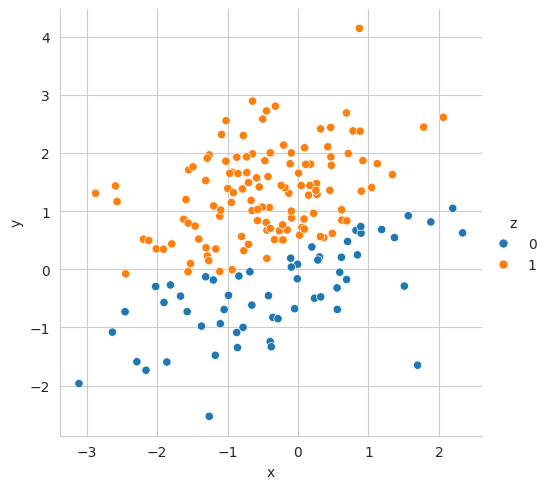

In [48]:
dat["z"] = (gamma_0 < 0.5).astype(int)
sns.relplot(data=dat, x="x", y="y", hue="z", kind="scatter")
plt.show()